# DATA SCIENCE - Bank Marketing (Campaign)

## Problem statement

ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
pd.set_option('display.max_columns', 500)
#import xgboost

%matplotlib inline
sns.set()
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)


In [2]:
path = "/Users/vicentesolorzano/Desktop/DATA_GLACIER/WEEK_7_FINAL_1/data/bank-additional-full.csv"

df = pd.read_csv(path,sep=";")
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print("Number of rows: ",df.shape[0]," - ","Number of columns: ",df.shape[1])

Number of rows:  41188  -  Number of columns:  21


Columns: 

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Columns types:

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

At first sight, we don´t have any nulls in the dataset:

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## DATA UNDERSTANDING

The data is related with direct marketing campaigns of a Portuguese banking institution. They provided us with certain data of more than 41.000 clients. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## 1) FEATURES

### Data related with clients : 

1) age (numeric)

2) job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3) marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4) education (categorical): 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5) default: has credit in default? (categorical: 'no','yes','unknown')

6) housing: has housing loan? (categorical: 'no','yes','unknown')

7) loan: has personal loan? (categorical: 'no','yes','unknown')

### Data related with the last contact :

8) contact: contact communication type (categorical: 'cellular','telephone') 

9) month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10) day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Data related with the campaing :

12) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14) previous: number of contacts performed before this campaign and for this client (numeric)

15) poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Data related with social and economic context attributes:

16) emp.var.rate: employment variation rate - quarterly indicator (numeric)

17) cons.price.idx: consumer price index - monthly indicator (numeric) 

18) cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19) euribor3m: euribor 3 month rate - daily indicator (numeric)

20) nr.employed: number of employees - quarterly indicator (numeric)

### Target :

21) y - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
#Separate features into different features to work easily. 
#They will have the features for each topic and the target.

client_columns = ['age','job', 'marital', 'education', 'default', 'housing', 'loan',"y"]
contact_columns = ['contact', 'month', 'day_of_week', 'duration',"y"]
campaign_columns = ['campaign', 'pdays','previous', 'poutcome',"y"]
socioeconomic_columns = ['emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed',"y"]

client_df = df[client_columns]
contact_df = df[contact_columns]
campaign_df = df[campaign_columns]
socioeconomic_df = df[socioeconomic_columns]


## 2) CLIENTS

### Demographic analysis


In [8]:
client_df.head(2)

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no


### Marital state

In [5]:
client_df.groupby("marital")["age"].count()

marital
divorced     4612
married     24928
single      11568
unknown        80
Name: age, dtype: int64

In [6]:
marital=(client_df.groupby("marital")["age"].count())/client_df.marital.count()*100
#marital.sum()

print("Marital state of customers (%): ")

marital

Marital state of customers (%): 


marital
divorced    11.197436
married     60.522482
single      28.085850
unknown      0.194231
Name: age, dtype: float64

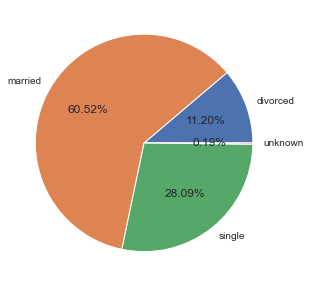

In [7]:
#Marital state

labels= ["divorced","married","single","unknown"]

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(marital, labels = labels ,autopct='%1.2f%%')
plt.show()




### Job

In [12]:
client_df.groupby("job")["age"].count()

job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
Name: age, dtype: int64

In [8]:
job=(client_df.groupby("job")["age"].count())/client_df.age.count()*100
#marital.sum()

print("Customers job (%): ")

job.sort_values(ascending=False)

Customers job (%): 


job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: age, dtype: float64

The majority of our customers are in 3 jobs: administration, blue collar or technician.

Text(0.5, 0, 'Jobs')

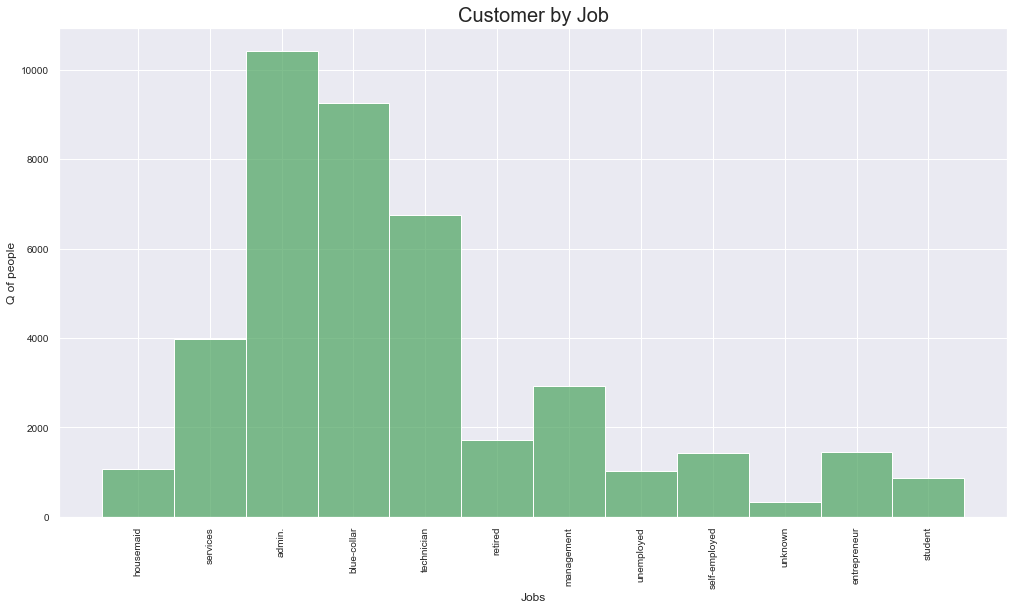

In [46]:

plt.figure(figsize=(17,9))



ax=sns.histplot(data=client_df.job,bins=40, color= 'g')
plt.setp( ax.get_xticklabels(),rotation=90)
plt.title('Customer by Job', fontsize=20)
plt.ylabel('Q of people')
plt.xlabel('Jobs')

### Age range

In [35]:
ranges=[0,30,40,50,60,100]
labels=["30 and under","31-40","41-50","51-60","over 60"]

client_df["age_range"]=pd.cut(client_df.age,bins= ranges,labels=labels)


In [36]:
customer_age_range=(client_df.groupby("age_range")["age"].count())/client_df.age.count()*100
#marital.sum()

print("Customers by age (%): ")

customer_age_range
#job.sort_values(ascending=False)

Customers by age (%): 


age_range
30 and under    17.925124
31-40           39.781004
41-50           24.861610
51-60           15.222880
over 60          2.209381
Name: age, dtype: float64

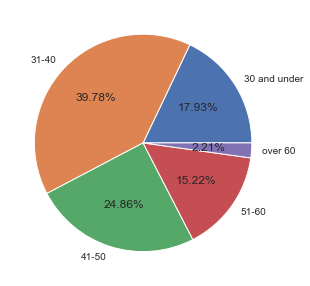

In [39]:
#age range

labels=["30 and under","31-40","41-50","51-60","over 60"]
fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(customer_age_range, labels = labels ,autopct='%1.2f%%')
plt.show()

31-40 and 41-50 seems to be our age segments with most customers. There are 64.6% of the customers

### Education

In [52]:
client_df.groupby("education")["age"].count()

education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
Name: age, dtype: int64

In [11]:
education_cust=(client_df.groupby("education")["age"].count())/client_df.age.count()*100
#marital.sum()

print("Customers education (%): ")

education_cust=education_cust.sort_values(ascending=False)
education_cust

Customers education (%): 


education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: age, dtype: float64

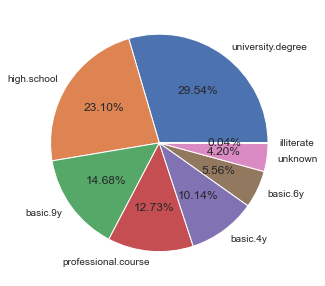

In [54]:
#education

labels=list(education_cust.index)
fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(education_cust ,labels=labels,autopct='%1.2f%%')
plt.show()

More than the 65% of the customers have at least a high school degree. More than 35% have a professional course or university degree.

### Default, housing & loan

Text(0.5, 0, 'Personal loan')

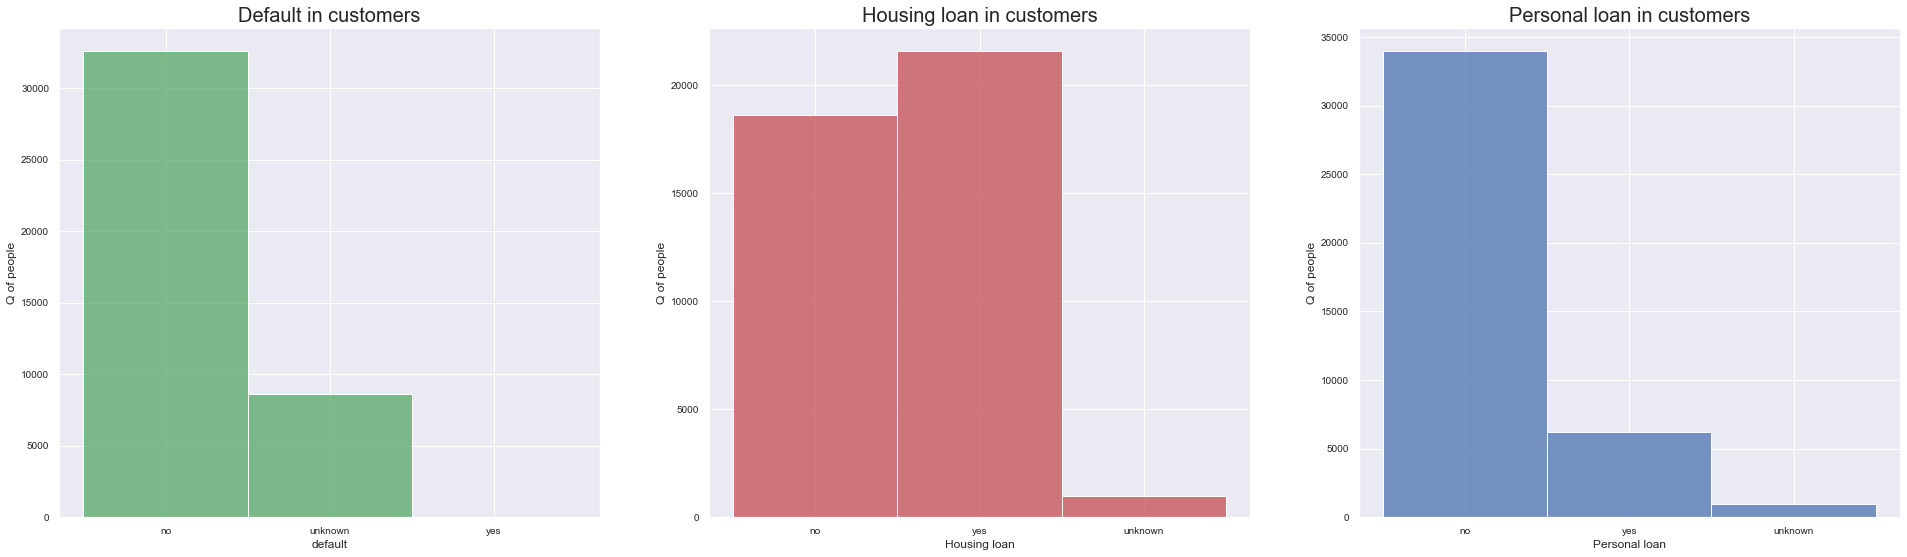

In [55]:
plt.figure(figsize=(33,9))

plt.subplot(1,3,1)

ax=sns.histplot(data=client_df.default,bins=40, color= 'g')
plt.setp( ax.get_xticklabels(),rotation=0)
plt.title('Default in customers', fontsize=20)
plt.ylabel('Q of people')
plt.xlabel('default')

plt.subplot(1,3,2)

ax=sns.histplot(data=client_df.housing,bins=40, color= 'r')
plt.setp( ax.get_xticklabels(),rotation=0)
plt.title('Housing loan in customers', fontsize=20)
plt.ylabel('Q of people')
plt.xlabel('Housing loan')

plt.subplot(1,3,3)

ax=sns.histplot(data=client_df.loan,bins=40, color= 'b')
plt.setp( ax.get_xticklabels(),rotation=0)
plt.title('Personal loan in customers', fontsize=20)
plt.ylabel('Q of people')
plt.xlabel('Personal loan')

In [12]:
default_cust=client_df.groupby("default")["age"].count()
default_cust

default
no         32588
unknown     8597
yes            3
Name: age, dtype: int64

In [57]:
default_cust/client_df.age.count()*100

default
no         79.120132
unknown    20.872584
yes         0.007284
Name: age, dtype: float64

Seems to be a lack of customers in default, just 3, but consider that unknown have to be taken as null values. Unknown are more than 20% of the customers.

### Last Contact 

Little analysis of the data about the last contact.

In [13]:
contact=contact_df.groupby("contact")["contact"].count()

contact_per=contact/contact_df.contact.count()*100

contact_per

contact
cellular     63.474798
telephone    36.525202
Name: contact, dtype: float64

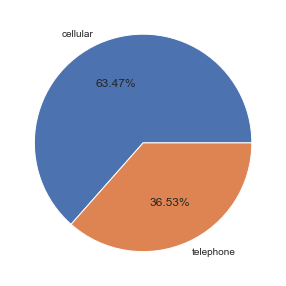

In [71]:


labels=list(contact.index)
fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(contact_per ,labels=labels,autopct='%1.2f%%')
plt.show()

In [14]:
contact_month=contact_df.groupby("month")["contact"].count().sort_values(ascending=False)
contact_month_df=pd.DataFrame(contact_month)


contact_month_df.head(5)


,contact
month,
may,13769
jul,7174
aug,6178
jun,5318
nov,4101


5 top contact months were may , july, august, june and november.

Text(0.5, 0, 'Duration of the call')

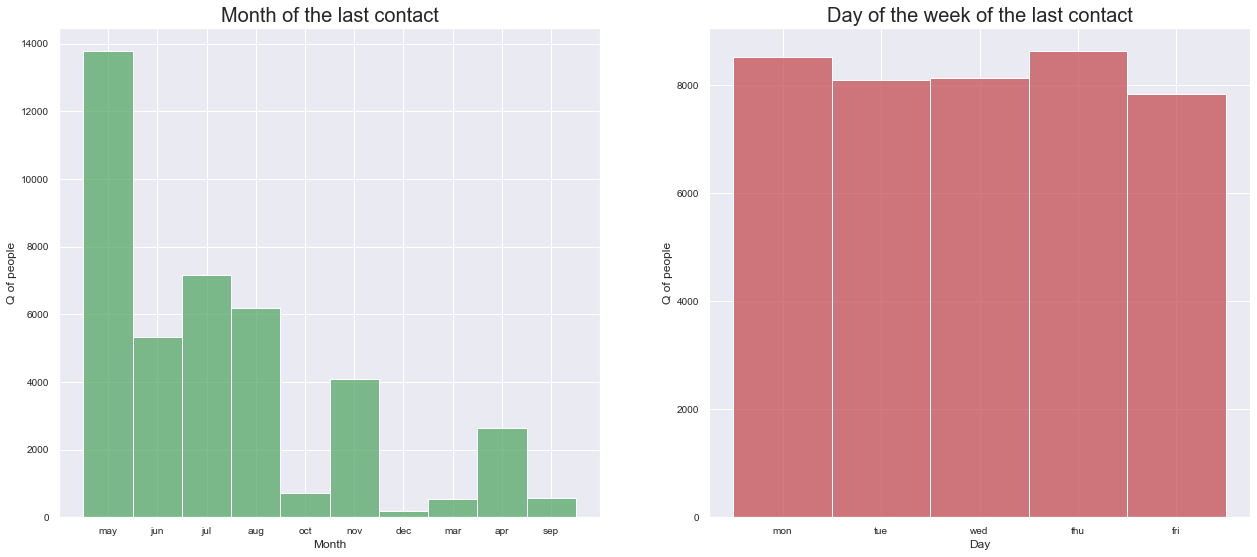

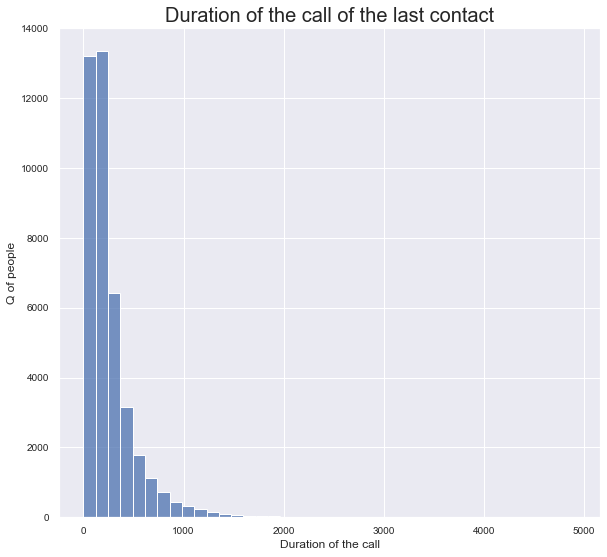

In [107]:
plt.figure(figsize=(33,9))

plt.subplot(1,3,1)

ax=sns.histplot(data=contact_df.month,bins=40, color= 'g')
plt.setp( ax.get_xticklabels(),rotation=0)
plt.title('Month of the last contact', fontsize=20)
plt.ylabel('Q of people')
plt.xlabel('Month')

plt.subplot(1,3,2)

ax=sns.histplot(data=contact_df.day_of_week,bins=40, color= 'r')
plt.setp( ax.get_xticklabels(),rotation=0)
plt.title('Day of the week of the last contact', fontsize=20)
plt.ylabel('Q of people')
plt.xlabel('Day')

plt.figure(figsize=(33,9))

plt.subplot(1,3,3)

ax=sns.histplot(data=contact_df.duration,bins=40, color= 'b')
plt.setp( ax.get_xticklabels(),rotation=0)
plt.title('Duration of the call of the last contact', fontsize=20)
plt.ylabel('Q of people')
plt.xlabel('Duration of the call')



In [134]:
contact_df.duration[contact_df.duration=="unknown"]

Series([], Name: duration, dtype: int64)

Contact are almost the same by the different days of the week. The most

In [135]:
contact_df.duration.unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868])

In [41]:
ranges=[-1,200,400,600,800,1000,5000]
labels=["0-200","201-400","401-600","601-800","801-1000","over 1000"]

contact_df["duration_range"]=pd.cut(contact_df.duration,bins= ranges,labels=labels)



In [43]:
contact_duration_range=contact_df.groupby("duration_range")["contact"].count()
contact_duration_range

duration_range
0-200        22760
201-400      11264
401-600       3700
601-800       1707
801-1000       801
over 1000      956
Name: contact, dtype: int64

As we know, this attribute highly affects the output target. So it is a nice a anlysis to understand how it is related with "y" rate, but it is a little useless. We won´t have this information if we want to predict the future acceptance by the client.

## Campaing 

In [17]:
poutcome_gb=campaign_df.groupby("poutcome")["campaign"].count()

poutcome_gb_per=poutcome_gb/campaign_df.campaign.count()*100

Outcome of the previous marketing campaign: 

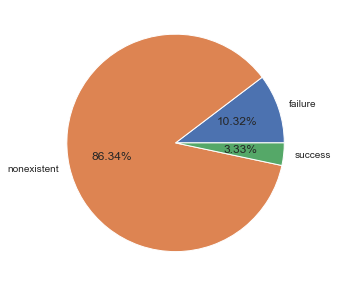

In [188]:
labels=list(poutcome_gb_per.index)
fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(poutcome_gb_per ,labels=labels,autopct='%1.2f%%')
plt.show()


Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

In [33]:
ranges=[-1,3,6,9,12,100]
labels=["0-3","4-6","7-9","10-12","More than 12"]

campaign_df["campaign_range"]=pd.cut(campaign_df.campaign,bins= ranges,labels=labels)



In [34]:
campaign_range_df=campaign_df.groupby("campaign_range")["campaign"].count()

campaign_range_df_per=campaign_range_df/(campaign_df.campaign.count())*100

campaign_range_df_per

campaign_range
0-3             81.463047
4-6             12.695445
7-9              3.185394
10-12            1.279499
More than 12     1.376615
Name: campaign, dtype: float64

In [22]:

#pdays
#numeric; 999 means client was not previously contacted)
#poutcome
#nonexistent = there were not previous campaign.

"pdays": Number of days that passed by after the client was last contacted from a previous campaign: (numeric; 999 means client was not previously contacted)

In [46]:
ranges=[-1,5,10,15,20,25,30,1000]
labels=["0-5","6-10","11-15","16-20","21-25","26-30","No previous contacted"]

campaign_df["pdays_range"]=pd.cut(campaign_df.pdays,bins= ranges,labels=labels)


In [47]:
pdays_range_df=campaign_df.groupby("pdays_range")["campaign"].count()

pdays_range_df_per=pdays_range_df/(campaign_df.campaign.count())*100

pdays_range_df_per


pdays_range
0-5                       1.711664
6-10                      1.471302
11-15                     0.403030
16-20                     0.072837
21-25                     0.014567
26-30                     0.004856
No previous contacted    96.321744
Name: campaign, dtype: float64

Most of clients were no contacted before (96%).

Previous: number of contacts performed before this campaign and for this client (numeric)

In [216]:
campaign_df.groupby("previous")["campaign"].count()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: campaign, dtype: int64

## 3) CLIENT ANALYSIS AND TARGET

### Age range and target

Text(0.5, 1.0, 'Agewise Distribution')

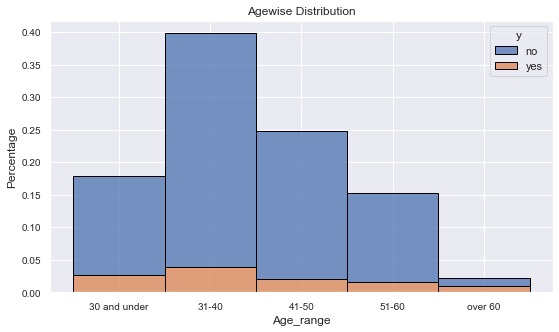

In [49]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.histplot(data=client_df, x='age_range', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.xlabel("Age_range") 
plt.ylabel("Percentage")
plt.title("Agewise Distribution")

In [48]:
pivot_age=client_df.pivot_table("age",index="age_range",columns="y",aggfunc="count",margins=True, margins_name= "totals")

pivot_age["% no"]=pivot_age.no/pivot_age.totals*100
pivot_age["% yes"]=pivot_age.yes/pivot_age.totals*100

pivot_age

y,no,yes,totals,% no,% yes
age_range,,,,,
30 and under,6259,1124,7383,84.775836,15.224164
31-40,14788,1597,16385,90.253280,9.746720
41-50,9403,837,10240,91.826172,8.173828
51-60,5602,668,6270,89.346093,10.653907
over 60,496,414,910,54.505495,45.494505
totals,36548,4640,41188,88.734583,11.265417


People over 60 is the range with higher acceptance range of the term deposit.

### Job, Marital, Education and target

In [23]:
client_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y',
       'age_range'],
      dtype='object')

Text(0.5, 1.0, 'Education Distribution')

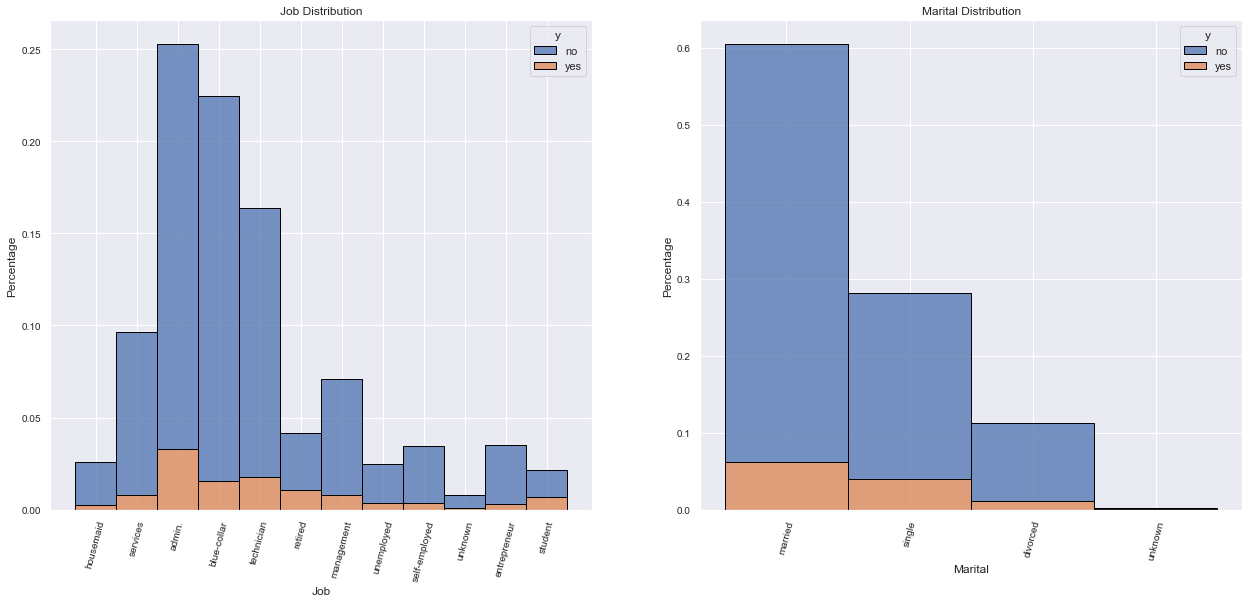

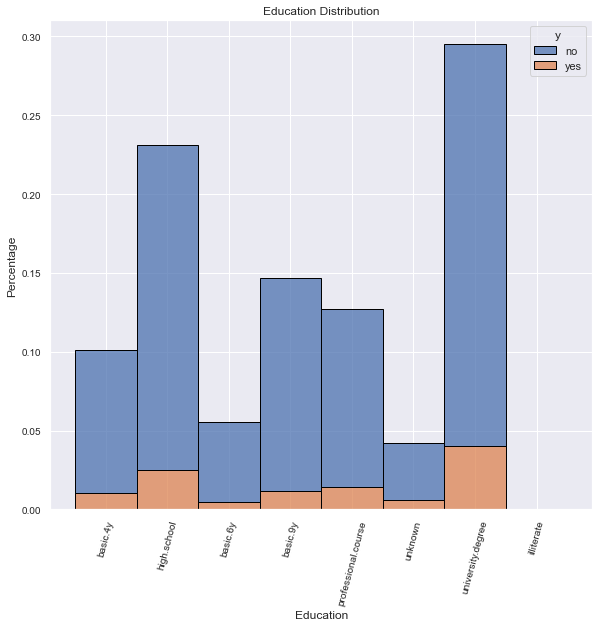

In [42]:
plt.figure(figsize=(33,9))

plt.subplot(1,3,1)

#fig, ax = plt.subplots(figsize = (9, 5))
ax = sns.histplot(data=client_df, x='job', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Job") 
plt.ylabel("Percentage")
plt.title("Job Distribution")

plt.subplot(1,3,2)

#fig, ax = plt.subplots(figsize = (9, 5))
ax = sns.histplot(data=client_df, x='marital', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Marital") 
plt.ylabel("Percentage")
plt.title("Marital Distribution")

plt.figure(figsize=(33,9))

plt.subplot(1,3,3)

#fig, ax = plt.subplots(figsize = (9, 5))
#plt.setp( ax.get_xticklabels(),rotation=90)
ax = sns.histplot(data=client_df, x='education', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Education") 
plt.ylabel("Percentage")
plt.title("Education Distribution")



In [77]:
pivot_job=client_df.pivot_table(values = "age",index="job",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_job["% no"]=pivot_job.no/pivot_job.totals*100
pivot_job["% yes"]=pivot_job.yes/pivot_job.totals*100


pivot_job

y,no,yes,totals,% no,% yes
job,,,,,
admin.,9070,1352,10422,87.027442,12.972558
blue-collar,8616,638,9254,93.105684,6.894316
entrepreneur,1332,124,1456,91.483516,8.516484
housemaid,954,106,1060,90.000000,10.000000
management,2596,328,2924,88.782490,11.217510
retired,1286,434,1720,74.767442,25.232558
self-employed,1272,149,1421,89.514426,10.485574
services,3646,323,3969,91.861930,8.138070
student,600,275,875,68.571429,31.428571


Retired and student are the jobs that have the highest acceptance rate.

In [79]:
pivot_marital=client_df.pivot_table(values = "age",index="marital",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_marital["% no"]=pivot_marital.no/pivot_marital.totals*100
pivot_marital["% yes"]=pivot_marital.yes/pivot_marital.totals*100


pivot_marital


y,no,yes,totals,% no,% yes
marital,,,,,
divorced,4136,476,4612,89.679098,10.320902
married,22396,2532,24928,89.842747,10.157253
single,9948,1620,11568,85.995851,14.004149
unknown,68,12,80,85.000000,15.000000
totals,36548,4640,41188,88.734583,11.265417


Single clients are the marital stage with highest acceptance rate.

In [82]:
pivot_education=client_df.pivot_table(values = "age",index="education",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_education["% no"]=pivot_education.no/pivot_education.totals*100
pivot_education["% yes"]=pivot_education.yes/pivot_education.totals*100


pivot_education

y,no,yes,totals,% no,% yes
education,,,,,
basic.4y,3748,428,4176,89.750958,10.249042
basic.6y,2104,188,2292,91.797557,8.202443
basic.9y,5572,473,6045,92.175352,7.824648
high.school,8484,1031,9515,89.164477,10.835523
illiterate,14,4,18,77.777778,22.222222
professional.course,4648,595,5243,88.651535,11.348465
university.degree,10498,1670,12168,86.275477,13.724523
unknown,1480,251,1731,85.499711,14.500289
totals,36548,4640,41188,88.734583,11.265417


Illiterate people are by far the clients who are buying the term deposit.

### Default, Housing Loan, Personal Loan and Target

Text(0.5, 1.0, 'Personal loan')

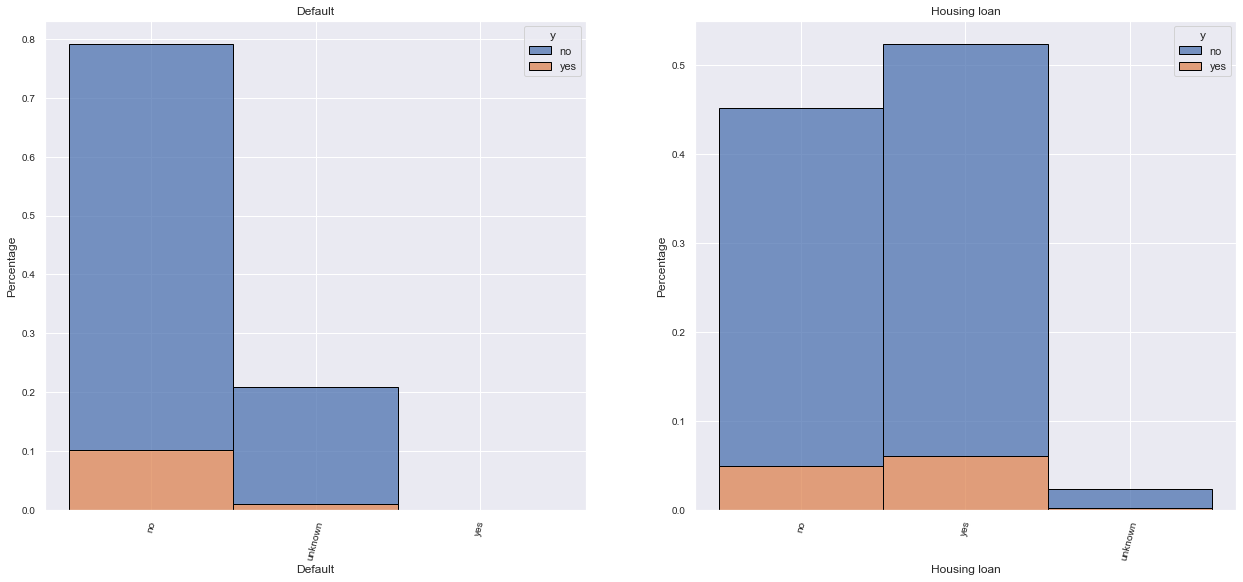

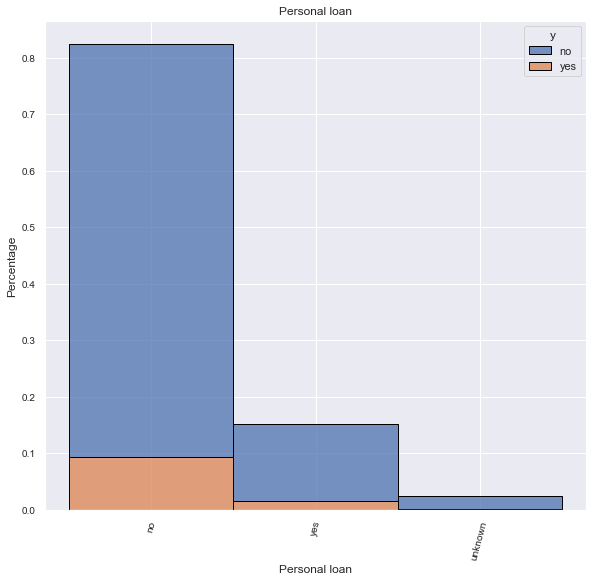

In [44]:
plt.figure(figsize=(33,9))

plt.subplot(1,3,1)

#fig, ax = plt.subplots(figsize = (9, 5))
ax = sns.histplot(data=client_df, x='default', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Default") 
plt.ylabel("Percentage")
plt.title("Default")

plt.subplot(1,3,2)

#fig, ax = plt.subplots(figsize = (9, 5))
ax = sns.histplot(data=client_df, x='housing', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Housing loan") 
plt.ylabel("Percentage")
plt.title("Housing loan")

plt.figure(figsize=(33,9))

plt.subplot(1,3,3)

#fig, ax = plt.subplots(figsize = (9, 5))
#plt.setp( ax.get_xticklabels(),rotation=90)
ax = sns.histplot(data=client_df, x='loan', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Personal loan") 
plt.ylabel("Percentage")
plt.title("Personal loan")



In [89]:
pivot_default=client_df.pivot_table(values = "age",index="default",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_default["% no"]=pivot_default.no/pivot_default.totals*100
pivot_default["% yes"]=pivot_default.yes/pivot_default.totals*100

print("Default: ")
pivot_default

Default: 


y,no,yes,totals,% no,% yes
default,,,,,
no,28391.0,4197.0,32588,87.121026,12.878974
unknown,8154.0,443.0,8597,94.847040,5.152960
yes,3.0,NaN,3,100.000000,NaN
totals,36548.0,4640.0,41188,88.734583,11.265417


We don't have reliable information to conclude. Unknown will be consider as nulls for the case and there is no clients who are in default and accepted the term deposit (according to the dataset).

In [91]:
pivot_housing=client_df.pivot_table(values = "age",index="housing",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_housing["% no"]=pivot_housing.no/pivot_housing.totals*100
pivot_housing["% yes"]=pivot_housing.yes/pivot_housing.totals*100

print("Housing Loan:")
pivot_housing

Housing Loan:


y,no,yes,totals,% no,% yes
housing,,,,,
no,16596,2026,18622,89.120395,10.879605
unknown,883,107,990,89.191919,10.808081
yes,19069,2507,21576,88.380608,11.619392
totals,36548,4640,41188,88.734583,11.265417


At first sight, there is no relation between having personal loan and accepting the term deposit. The acceptance rate is similar.

In [92]:
pivot_loan=client_df.pivot_table(values = "age",index="loan",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_loan["% no"]=pivot_loan.no/pivot_loan.totals*100
pivot_loan["% yes"]=pivot_loan.yes/pivot_loan.totals*100

print("Personal Loan: ")
pivot_loan

Personal Loan: 


y,no,yes,totals,% no,% yes
loan,,,,,
no,30100,3850,33950,88.659794,11.340206
unknown,883,107,990,89.191919,10.808081
yes,5565,683,6248,89.068502,10.931498
totals,36548,4640,41188,88.734583,11.265417


At first sight, there is no relation between having personal loan and accepting the term deposit. The acceptance rate is similar.

## Last Contact

In [121]:
contact_df.columns

Index(['contact', 'month', 'day_of_week', 'duration', 'y', 'duration_range'], dtype='object')

Text(0.5, 1.0, 'Duration of the call')

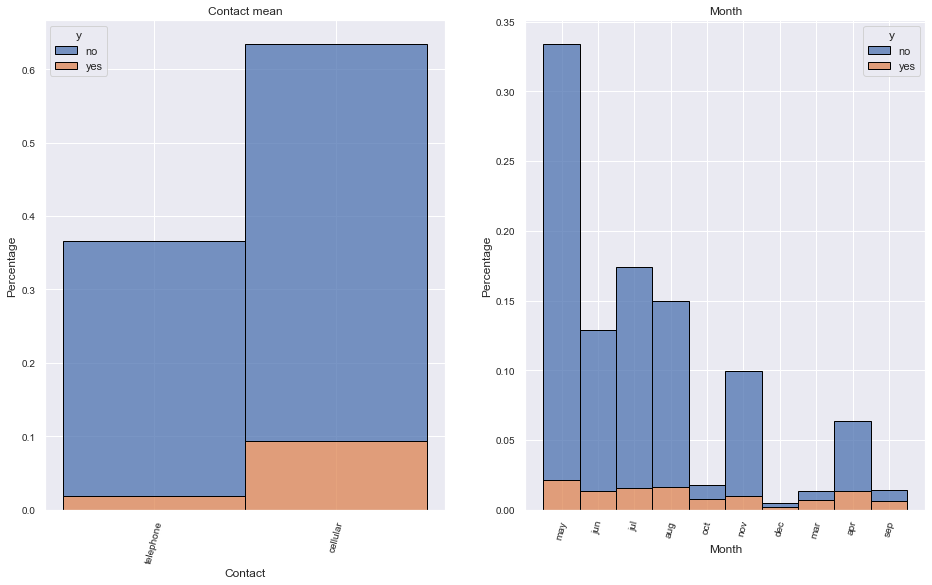

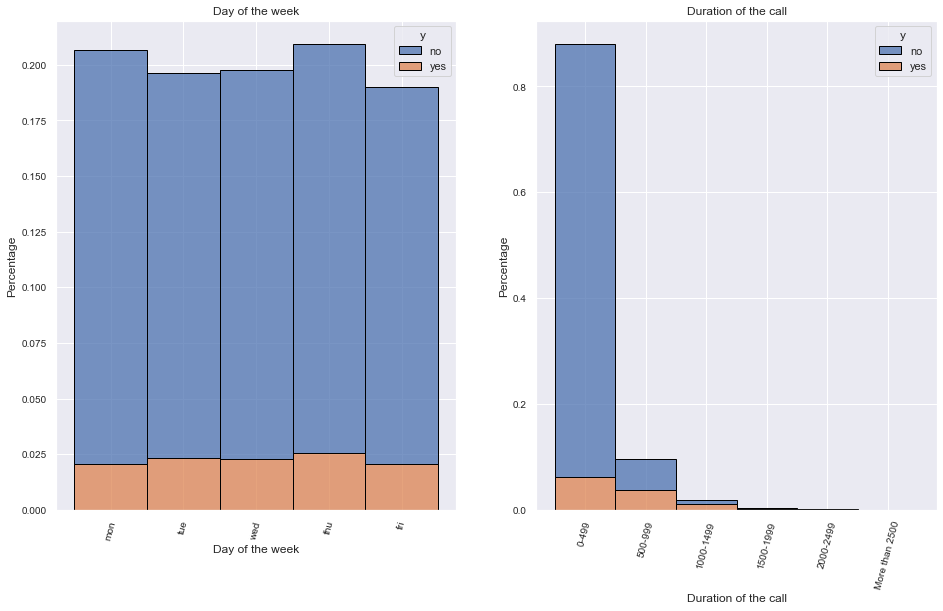

In [128]:
plt.figure(figsize=(33,9))

plt.subplot(1,4,1)

#fig, ax = plt.subplots(figsize = (9, 5))
ax = sns.histplot(data=contact_df, x='contact', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Contact") 
plt.ylabel("Percentage")
plt.title("Contact mean")

plt.subplot(1,4,2)

#fig, ax = plt.subplots(figsize = (9, 5))
ax = sns.histplot(data=contact_df, x='month', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Month") 
plt.ylabel("Percentage")
plt.title("Month")

plt.figure(figsize=(33,9))

plt.subplot(1,4,3)

#fig, ax = plt.subplots(figsize = (9, 5))
#plt.setp( ax.get_xticklabels(),rotation=90)
ax = sns.histplot(data=contact_df, x='day_of_week', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Day of the week") 
plt.ylabel("Percentage")
plt.title("Day of the week")

plt.subplot(1,4,4)

#fig, ax = plt.subplots(figsize = (9, 5))
#plt.setp( ax.get_xticklabels(),rotation=90)
ax = sns.histplot(data=contact_df, x='duration_range', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Duration of the call") 
plt.ylabel("Percentage")
plt.title("Duration of the call")


### Contact medium

In [99]:
pivot_contact=contact_df.pivot_table(values = "month",index="contact",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_contact["% no"]=pivot_contact.no/pivot_contact.totals*100
pivot_contact["% yes"]=pivot_contact.yes/pivot_contact.totals*100

print("Contact:")
pivot_contact


Contact:


y,no,yes,totals,% no,% yes
contact,,,,,
cellular,22291,3853,26144,85.262393,14.737607
telephone,14257,787,15044,94.768679,5.231321
totals,36548,4640,41188,88.734583,11.265417


The acceptance rate through cellular is way higher than telephone.

### Month

In [118]:
pivot_month=contact_df.pivot_table(values = "contact",index="month",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_month["% no"]=pivot_month.no/pivot_month.totals*100
pivot_month["% yes"]=pivot_month.yes/pivot_month.totals*100

print("Last month of contact:")
pivot_month



Last month of contact:


y,no,yes,totals,% no,% yes
month,,,,,
apr,2093,539,2632,79.521277,20.478723
aug,5523,655,6178,89.397863,10.602137
dec,93,89,182,51.098901,48.901099
jul,6525,649,7174,90.953443,9.046557
jun,4759,559,5318,89.488530,10.511470
mar,270,276,546,49.450549,50.549451
may,12883,886,13769,93.565255,6.434745
nov,3685,416,4101,89.856133,10.143867
oct,403,315,718,56.128134,43.871866


March, december, september and october are months with an acceptance rate of over 40%.

### Day of the week

In [115]:
pivot_day=contact_df.pivot_table(values = "contact",index="day_of_week",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_day["% no"]=pivot_day.no/pivot_day.totals*100
pivot_day["% yes"]=pivot_day.yes/pivot_day.totals*100

print("Day of the week:")
pivot_day




Day of the week:


y,no,yes,totals,% no,% yes
day_of_week,,,,,
fri,6981,846,7827,89.191261,10.808739
mon,7667,847,8514,90.051680,9.948320
thu,7578,1045,8623,87.881248,12.118752
tue,7137,953,8090,88.220025,11.779975
wed,7185,949,8134,88.332924,11.667076
totals,36548,4640,41188,88.734583,11.265417


The acceptance rate through the days is similar.

### Duration

In [52]:
ranges=[-1,300,600,900,1200,1500,1800,2100,2400,5000]
labels=["0-300","301-600","601-900","901-1200","1201-1500","1501-1800","1801-2100","2101-2400","More than 2400"]

contact_df["duration_range"]=pd.cut(contact_df.duration,bins= ranges,labels=labels)



In [53]:
pivot_duration=contact_df.pivot_table(values = "contact",index="duration_range",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_duration["% no"]=pivot_duration.no/pivot_duration.totals*100
pivot_duration["% yes"]=pivot_duration.yes/pivot_duration.totals*100

print("Duration of the call:")
pivot_duration



Duration of the call:


y,no,yes,totals,% no,% yes
duration_range,,,,,
0-300,28466,1518,29984,94.937300,5.062700
301-600,6302,1438,7740,81.421189,18.578811
601-900,1259,924,2183,57.672927,42.327073
901-1200,329,439,768,42.838542,57.161458
1201-1500,115,192,307,37.459283,62.540717
1501-1800,36,69,105,34.285714,65.714286
1801-2100,22,34,56,39.285714,60.714286
2101-2400,6,8,14,42.857143,57.142857
More than 2400,13,18,31,41.935484,58.064516


Despite the fact that long calls, seems to be a synonim of better conversion, the real situation shows that there are very few calls that last more than 1500 seconds. The focus should be in the first 5 ranges.

## Campaign

In [60]:
campaign_df

,campaign,pdays,previous,poutcome,y,campaign_range,pdays_range
0,1,999,0,nonexistent,no,0-3,No previous contacted
1,1,999,0,nonexistent,no,0-3,No previous contacted
2,1,999,0,nonexistent,no,0-3,No previous contacted
3,1,999,0,nonexistent,no,0-3,No previous contacted
4,1,999,0,nonexistent,no,0-3,No previous contacted
...,...,...,...,...,...,...,...
41183,1,999,0,nonexistent,yes,0-3,No previous contacted
41184,1,999,0,nonexistent,no,0-3,No previous contacted
41185,2,999,0,nonexistent,no,0-3,No previous contacted
41186,1,999,0,nonexistent,yes,0-3,No previous contacted


In [65]:
pivot_campaign=campaign_df.pivot_table(values = "campaign",index="campaign_range",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_campaign["% no"]=pivot_campaign.no/pivot_campaign.totals*100
pivot_campaign["% yes"]=pivot_campaign.yes/pivot_campaign.totals*100

print("Previous contacts in campaign:")
pivot_campaign



Previous contacts in campaign:


y,no,yes,totals,% no,% yes
campaign_range,,,,,
0-3,29468,4085,33553,87.825232,12.174768
4-6,4785,444,5229,91.508893,8.491107
7-9,1240,72,1312,94.512195,5.487805
10-12,500,27,527,94.876660,5.123340
More than 12,555,12,567,97.883598,2.116402
totals,36548,4640,41188,88.734583,11.265417


Seems to be that customers with better acceptance or conversion rate are customers contacted 0-3 times. Consider that there are near 70% of customers, so take it into account for posterior analysis.

In [67]:
pivot_pdays=campaign_df.pivot_table(values = "campaign",index="pdays_range",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_pdays["% no"]=pivot_pdays.no/pivot_pdays.totals*100
pivot_pdays["% yes"]=pivot_pdays.yes/pivot_pdays.totals*100

print("Days from last contact in previous campaign:")
pivot_pdays



Days from last contact in previous campaign:


y,no,yes,totals,% no,% yes
pdays_range,,,,,
0-5,260.0,445.0,705,36.879433,63.120567
6-10,200.0,406.0,606,33.003300,66.996700
11-15,70.0,96.0,166,42.168675,57.831325
16-20,17.0,13.0,30,56.666667,43.333333
21-25,1.0,5.0,6,16.666667,83.333333
26-30,NaN,2.0,2,NaN,100.000000
No previous contacted,36000.0,3673.0,39673,90.741814,9.258186
totals,36548.0,4640.0,41188,88.734583,11.265417


Most of customers were not contacted before.

In [71]:
pivot_previous=campaign_df.pivot_table(values = "campaign",index="previous",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_previous["% no"]=pivot_previous.no/pivot_previous.totals*100
pivot_previous["% yes"]=pivot_previous.yes/pivot_previous.totals*100

print("Contacts before this campaign:")
pivot_previous



Contacts before this campaign:


y,no,yes,totals,% no,% yes
previous,,,,,
0,32422.0,3141.0,35563,91.167787,8.832213
1,3594.0,967.0,4561,78.798509,21.201491
2,404.0,350.0,754,53.580902,46.419098
3,88.0,128.0,216,40.740741,59.259259
4,32.0,38.0,70,45.714286,54.285714
5,5.0,13.0,18,27.777778,72.222222
6,2.0,3.0,5,40.000000,60.000000
7,1.0,NaN,1,100.000000,NaN
totals,36548.0,4640.0,41188,88.734583,11.265417


More contactas seems to be better acceptance/conversion rate.

In [73]:
pivot_poutcome=campaign_df.pivot_table(values = "campaign",index="poutcome",columns= "y",aggfunc="count",margins=True, margins_name= "totals")

pivot_poutcome["% no"]=pivot_poutcome.no/pivot_poutcome.totals*100
pivot_poutcome["% yes"]=pivot_poutcome.yes/pivot_poutcome.totals*100

print("Outcome from previous campaign:")
pivot_poutcome



Outcome from previous campaign:


y,no,yes,totals,% no,% yes
poutcome,,,,,
failure,3647,605,4252,85.771402,14.228598
nonexistent,32422,3141,35563,91.167787,8.832213
success,479,894,1373,34.887109,65.112891
totals,36548,4640,41188,88.734583,11.265417


Customers with a success in previous campaign have a way higher acceptance rate now.

Text(0.5, 1.0, 'Outcome from previous campaign')

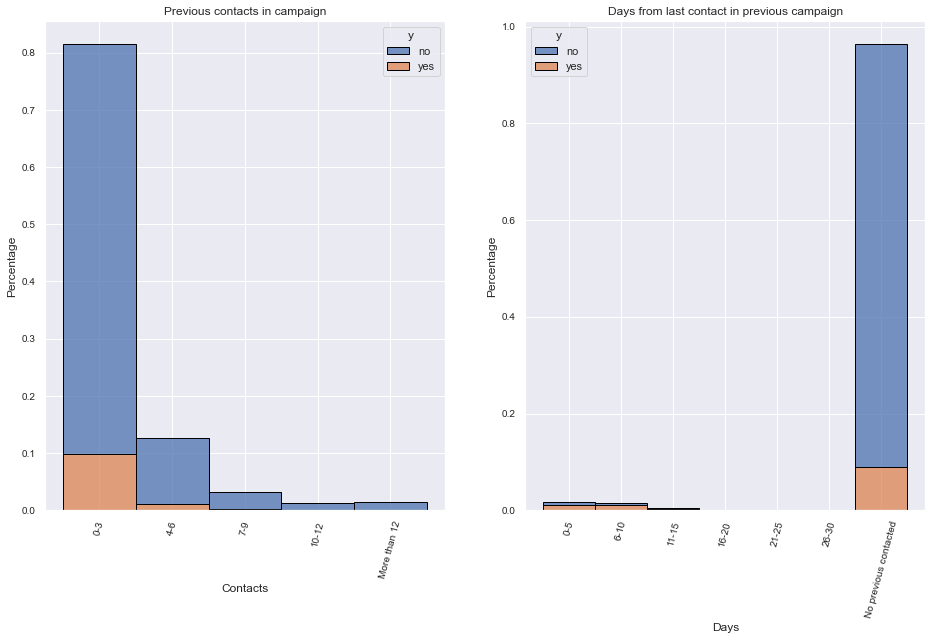

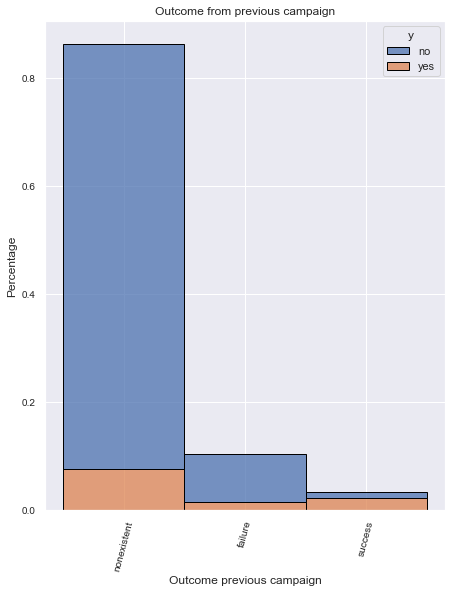

In [79]:
plt.figure(figsize=(33,9))

plt.subplot(1,4,1)

#fig, ax = plt.subplots(figsize = (9, 5))
ax = sns.histplot(data=campaign_df, x='campaign_range', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Contacts") 
plt.ylabel("Percentage")
plt.title("Previous contacts in campaign")

plt.subplot(1,4,2)

#fig, ax = plt.subplots(figsize = (9, 5))
ax = sns.histplot(data=campaign_df, x='pdays_range', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Days") 
plt.ylabel("Percentage")
plt.title("Days from last contact in previous campaign")

plt.figure(figsize=(33,9))

plt.subplot(1,4,3)

#fig, ax = plt.subplots(figsize = (9, 5))
#plt.setp( ax.get_xticklabels(),rotation=90)
ax = sns.histplot(data=campaign_df, x='poutcome', hue='y', binwidth=10,multiple='stack',stat="probability", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Outcome previous campaign") 
plt.ylabel("Percentage")
plt.title("Outcome from previous campaign")




